# Assignment 2- Logistics Regression
### Author : Sayali Bhagat

# Contents

- <a href='#1'>1. Part B - Logistics model</a> 
    - <a href='#1.1'> *Model 1:</a>  
    - <a href='#1.2'> *Model 2:</a>
    - <a href='#1.3'> *Model 3:</a>
- <a href='#2'>2. Cross Validation on Logistics Regression</a> 
- <a href='#3'>3. Multi-colinearity and step-wise Regression</a> 
    - <a href='#3.1'> *Model 1:</a>  
    - <a href='#3.2'> *Model 2:</a>
    - <a href='#3.3'> *Model 3:</a>
- <a href='#4'>4. Conclusion</a>
- <a href='#5'>5. Contributions statement</a>
- <a href='#6'>6. Citations</a>
- <a href='#7'>7. License</a>

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import mean_squared_error,accuracy_score, r2_score, make_scorer
from sklearn.model_selection import KFold

In [115]:
data = pd.read_csv('DC_Properties_1.csv')

In [116]:
data.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,ROOMS,BEDRM,EYB,SALEDATE,PRICE,...,SALE_NUM,FIREPLACES,USECODE,LANDAREA,SOURCE,ZIPCODE,ASSESSMENT_NBHD,WARD,QUADRANT,LOGPRICE
0,0,4,0,2,1,8,4,1972,2003,1095000.0,...,1,5,1,1680,1,3.0,2,3,2,13.906265
1,1,3,1,1,1,9,5,1984,2016,2100000.0,...,3,4,1,1680,1,3.0,2,3,2,14.557448
2,2,3,1,1,1,8,5,1984,2006,1602000.0,...,1,3,1,1680,1,3.0,2,3,2,14.286763
3,3,3,2,1,1,10,5,1972,2010,1950000.0,...,1,4,1,2196,1,3.0,2,3,2,14.483340
4,4,3,1,1,1,8,4,1972,2011,1050000.0,...,1,1,1,1627,1,3.0,2,3,2,13.864301


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97355 entries, 0 to 97354
Data columns (total 21 columns):
Unnamed: 0         97355 non-null int64
BATHRM             97355 non-null int64
HF_BATHRM          97355 non-null int64
HEAT               97355 non-null int64
AC                 97355 non-null int64
ROOMS              97355 non-null int64
BEDRM              97355 non-null int64
EYB                97355 non-null int64
SALEDATE           97355 non-null int64
PRICE              97355 non-null float64
QUALIFIED          97355 non-null int64
SALE_NUM           97355 non-null int64
FIREPLACES         97355 non-null int64
USECODE            97355 non-null int64
LANDAREA           97355 non-null int64
SOURCE             97355 non-null int64
ZIPCODE            97355 non-null float64
ASSESSMENT_NBHD    97355 non-null int64
WARD               97355 non-null int64
QUADRANT           97355 non-null int64
LOGPRICE           97355 non-null float64
dtypes: float64(3), int64(18)
memory usage: 1

In [118]:
data.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,ROOMS,BEDRM,EYB,SALEDATE,PRICE,...,SALE_NUM,FIREPLACES,USECODE,LANDAREA,SOURCE,ZIPCODE,ASSESSMENT_NBHD,WARD,QUADRANT,LOGPRICE
count,97355.000000,97355.000000,97355.000000,97355.000000,97355.000000,97355.000000,97355.000000,97355.000000,97355.000000,9.735500e+04,...,97355.000000,97355.000000,97355.000000,97355.000000,97355.000000,97355.000000,97355.000000,97355.000000,97355.000000,97355.000000
mean,48678.491695,1.863407,0.446664,1.916697,0.810600,5.936264,2.614000,1965.746762,2009.622444,6.085379e+05,...,1.865975,0.451810,1.000103,2086.472220,1.407303,2.682081,1.679554,2.147265,1.588547,12.851576
std,28105.964912,0.978861,0.576838,0.646787,0.391828,2.636260,1.392753,27.541788,6.631087,3.077400e+06,...,1.402578,0.782278,0.010134,2756.231562,0.491335,1.153400,0.749167,0.662193,0.492099,0.838376
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1800.000000,1982.000000,1.000000e+00,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,24338.500000,1.000000,0.000000,1.000000,1.000000,4.000000,2.000000,1954.000000,2005.000000,2.399995e+05,...,1.000000,0.000000,1.000000,484.000000,1.000000,2.000000,1.000000,2.000000,1.000000,12.388392
50%,48677.000000,2.000000,0.000000,2.000000,1.000000,6.000000,3.000000,1965.000000,2011.000000,3.999000e+05,...,1.000000,0.000000,1.000000,1392.000000,1.000000,3.000000,2.000000,2.000000,2.000000,12.898970
75%,73018.500000,2.000000,1.000000,2.000000,1.000000,7.000000,3.000000,1981.000000,2015.000000,6.500000e+05,...,3.000000,1.000000,1.000000,2562.000000,2.000000,3.000000,2.000000,3.000000,2.000000,13.384728
max,97360.000000,12.000000,11.000000,3.000000,1.000000,31.000000,20.000000,2018.000000,2018.000000,1.374275e+08,...,15.000000,13.000000,2.000000,187301.000000,2.000000,5.000000,4.000000,3.000000,2.000000,18.738607


In [119]:
sum(data.duplicated())

0

In [120]:
data.isnull().sum()
#There are missing values as we can see below in respective columns:

Unnamed: 0         0
BATHRM             0
HF_BATHRM          0
HEAT               0
AC                 0
ROOMS              0
BEDRM              0
EYB                0
SALEDATE           0
PRICE              0
QUALIFIED          0
SALE_NUM           0
FIREPLACES         0
USECODE            0
LANDAREA           0
SOURCE             0
ZIPCODE            0
ASSESSMENT_NBHD    0
WARD               0
QUADRANT           0
LOGPRICE           0
dtype: int64

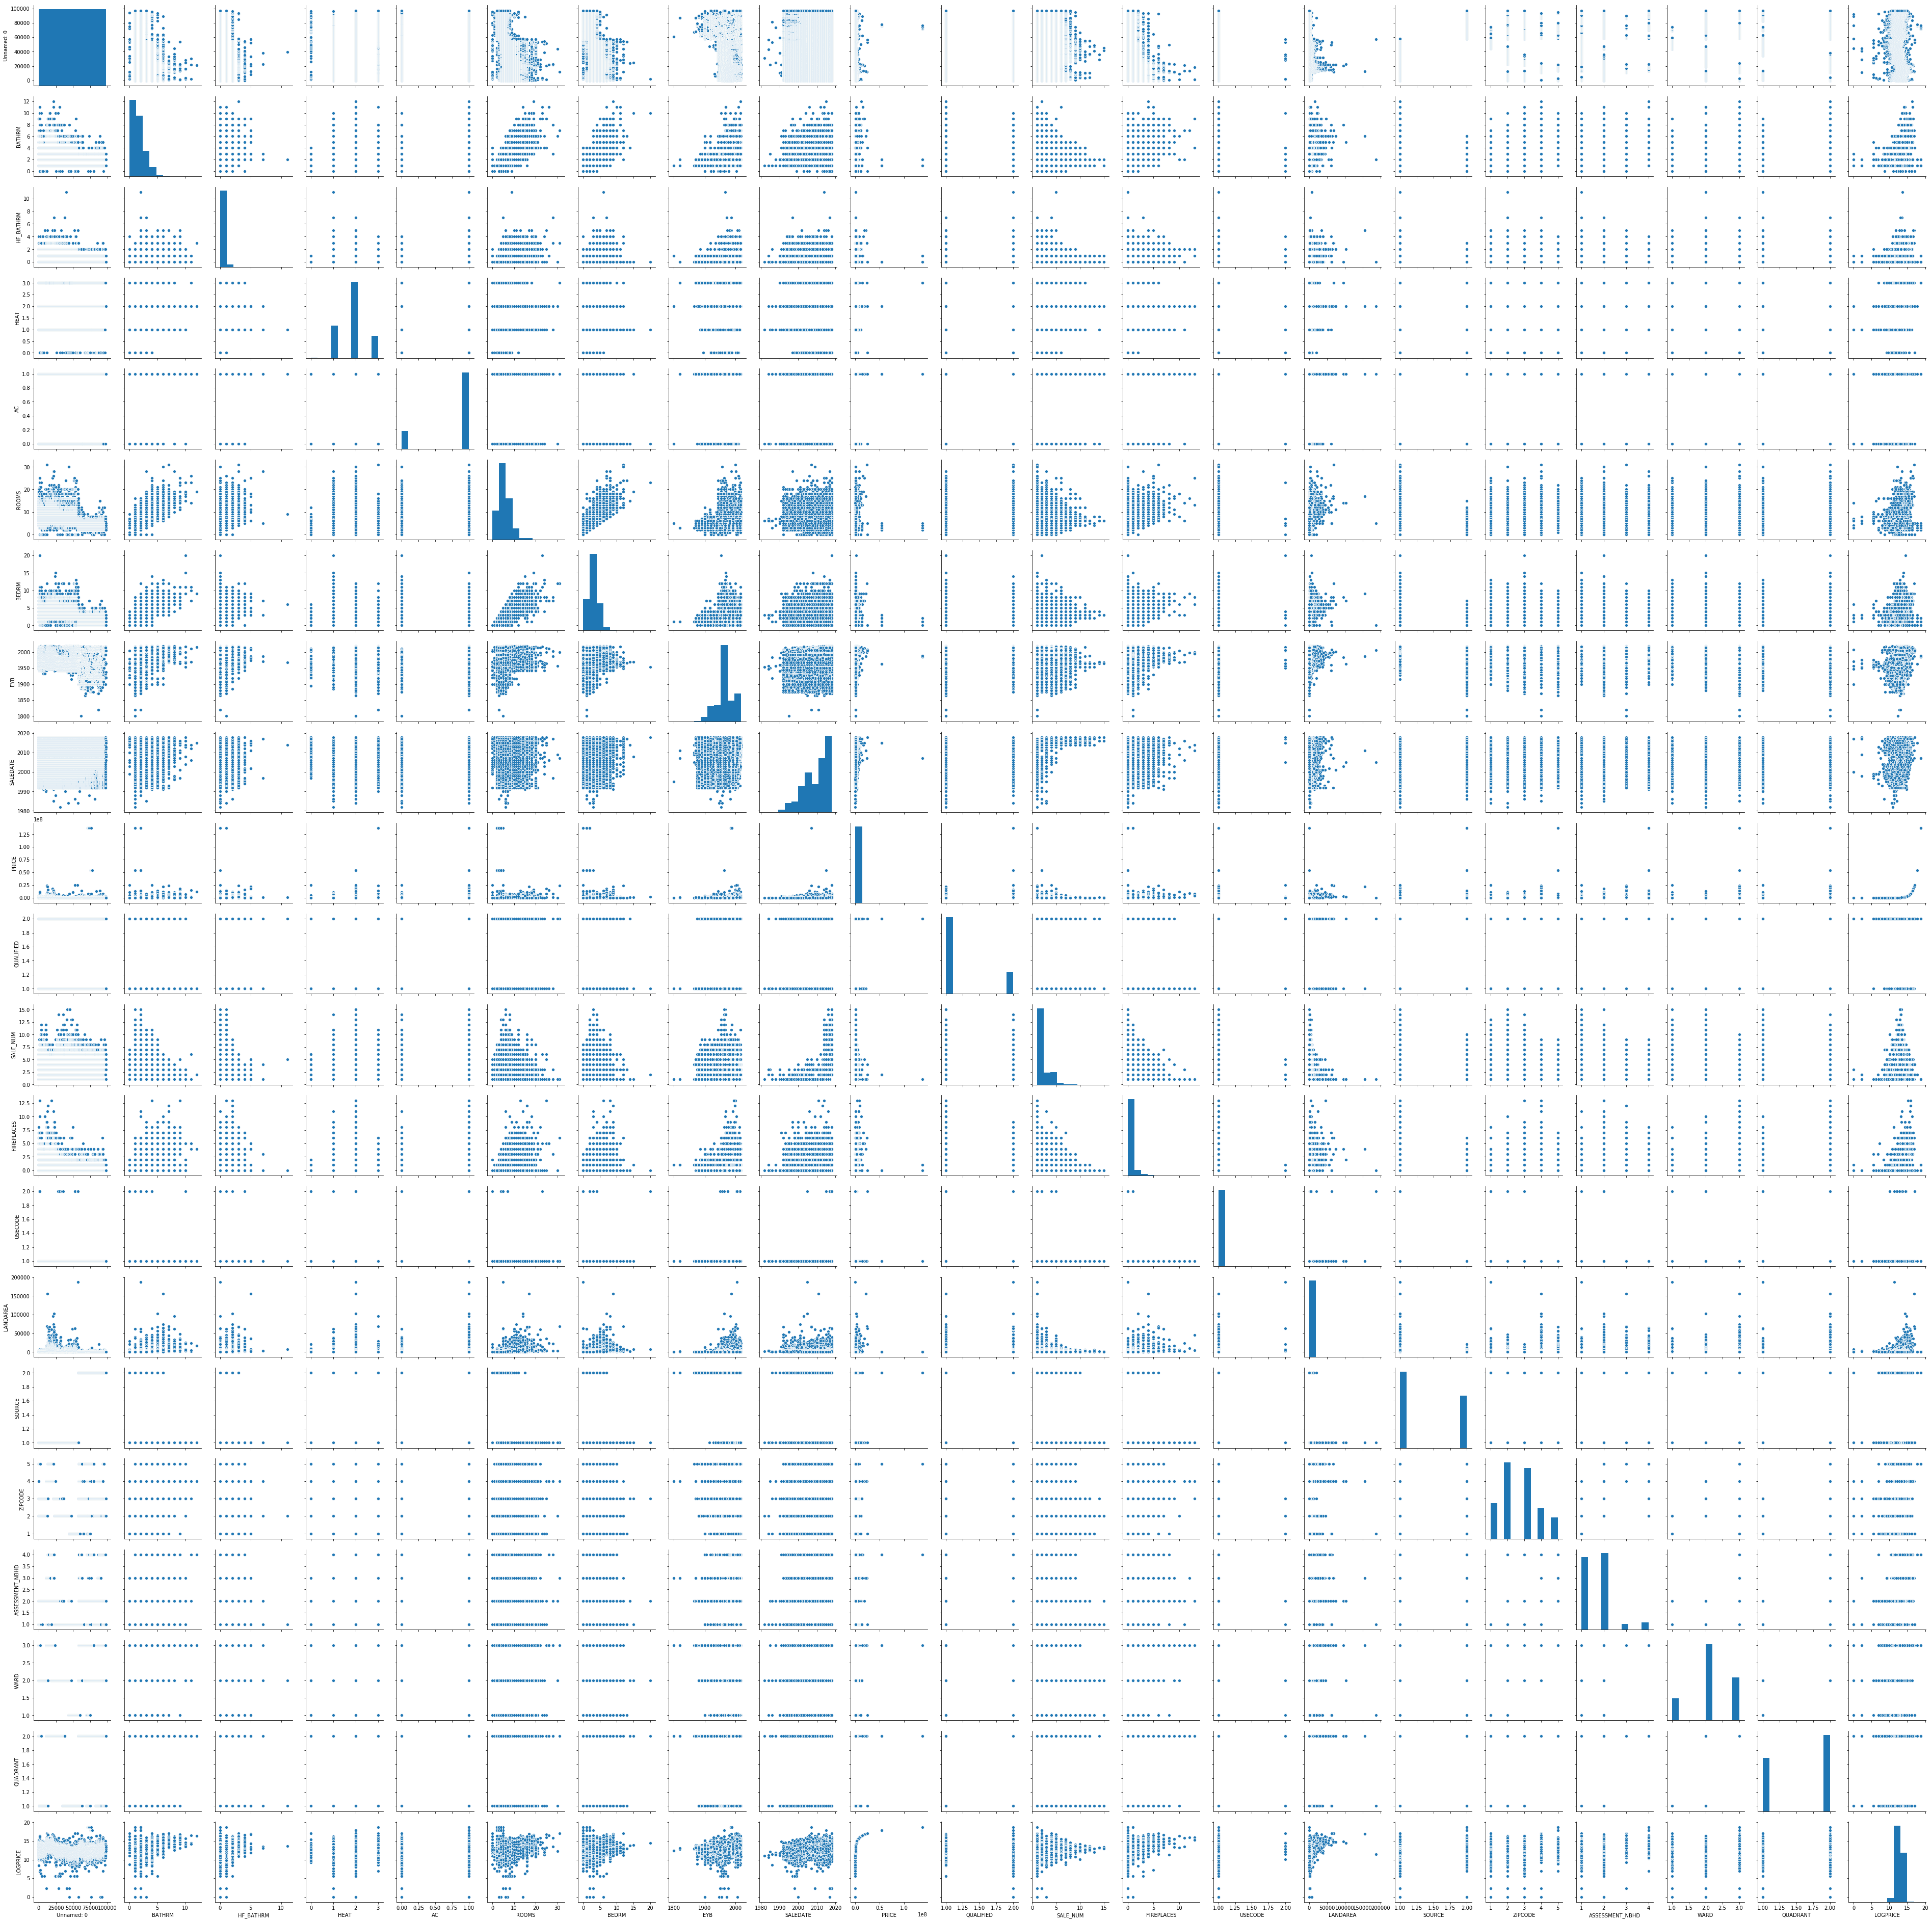

In [121]:
sns.pairplot(data)

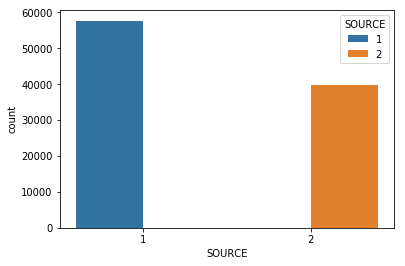

In [122]:
# Show value counts for the source as we are going to predict whether there's a demand for Condominium or Residential
sns.countplot(x="SOURCE", data=data, hue="SOURCE")
plt.show()
#The dataset shows that more number of Condominium is preferred then residential housing

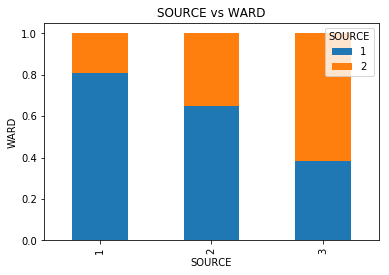

In [123]:
table=pd.crosstab(data.WARD,data.SOURCE)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('SOURCE vs WARD')
plt.xlabel('SOURCE')
plt.ylabel('WARD')
plt.savefig('ward_vs_source')

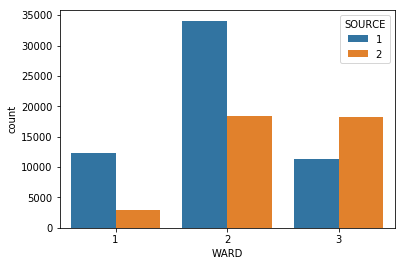

In [124]:
# Lets check the how many people prefer to live in which ward
sns.countplot(x='WARD',hue='SOURCE',data=data)

In [125]:
data['WARD'].unique()

array([3, 2, 1])

In [126]:
dummy_ranks = pd.get_dummies(data['WARD'], prefix='WARD')
dummy_ranks.head()
#dummification of WARD as they also seem significant in prediction of area for living preference

,WARD_1,WARD_2,WARD_3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [127]:
data_1 = pd.concat([data,dummy_ranks], axis =1)

In [128]:
data_2 = data_1.drop('WARD',axis=1)
data_2.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,ROOMS,BEDRM,EYB,SALEDATE,PRICE,...,USECODE,LANDAREA,SOURCE,ZIPCODE,ASSESSMENT_NBHD,QUADRANT,LOGPRICE,WARD_1,WARD_2,WARD_3
0,0,4,0,2,1,8,4,1972,2003,1095000.0,...,1,1680,1,3.0,2,2,13.906265,0,0,1
1,1,3,1,1,1,9,5,1984,2016,2100000.0,...,1,1680,1,3.0,2,2,14.557448,0,0,1
2,2,3,1,1,1,8,5,1984,2006,1602000.0,...,1,1680,1,3.0,2,2,14.286763,0,0,1
3,3,3,2,1,1,10,5,1972,2010,1950000.0,...,1,2196,1,3.0,2,2,14.483340,0,0,1
4,4,3,1,1,1,8,4,1972,2011,1050000.0,...,1,1627,1,3.0,2,2,13.864301,0,0,1


In [129]:
data_2['SOURCE']=pd.factorize(data_2['SOURCE'])[0]
#Making Residential and Condominium as boolean values for Condominium=0 and Residential=1

In [130]:
data_2.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,ROOMS,BEDRM,EYB,SALEDATE,PRICE,...,USECODE,LANDAREA,SOURCE,ZIPCODE,ASSESSMENT_NBHD,QUADRANT,LOGPRICE,WARD_1,WARD_2,WARD_3
0,0,4,0,2,1,8,4,1972,2003,1095000.0,...,1,1680,0,3.0,2,2,13.906265,0,0,1
1,1,3,1,1,1,9,5,1984,2016,2100000.0,...,1,1680,0,3.0,2,2,14.557448,0,0,1
2,2,3,1,1,1,8,5,1984,2006,1602000.0,...,1,1680,0,3.0,2,2,14.286763,0,0,1
3,3,3,2,1,1,10,5,1972,2010,1950000.0,...,1,2196,0,3.0,2,2,14.483340,0,0,1
4,4,3,1,1,1,8,4,1972,2011,1050000.0,...,1,1627,0,3.0,2,2,13.864301,0,0,1


In [131]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.185830
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.725     
Dependent Variable: SOURCE           AIC:              36195.0501
Date:               2019-02-25 12:14 BIC:              36251.9668
No. Observations:   97355            Log-Likelihood:   -18092.   
Df Model:           5                LL-Null:          -65799.   
Df Residuals:       97349            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
BATHRM    0.9340     0.0237    39.3708   0.0000    0.8875    0.9805
WARD_1    9.2081     0.0787   117.0659   0.0000    9.0539 

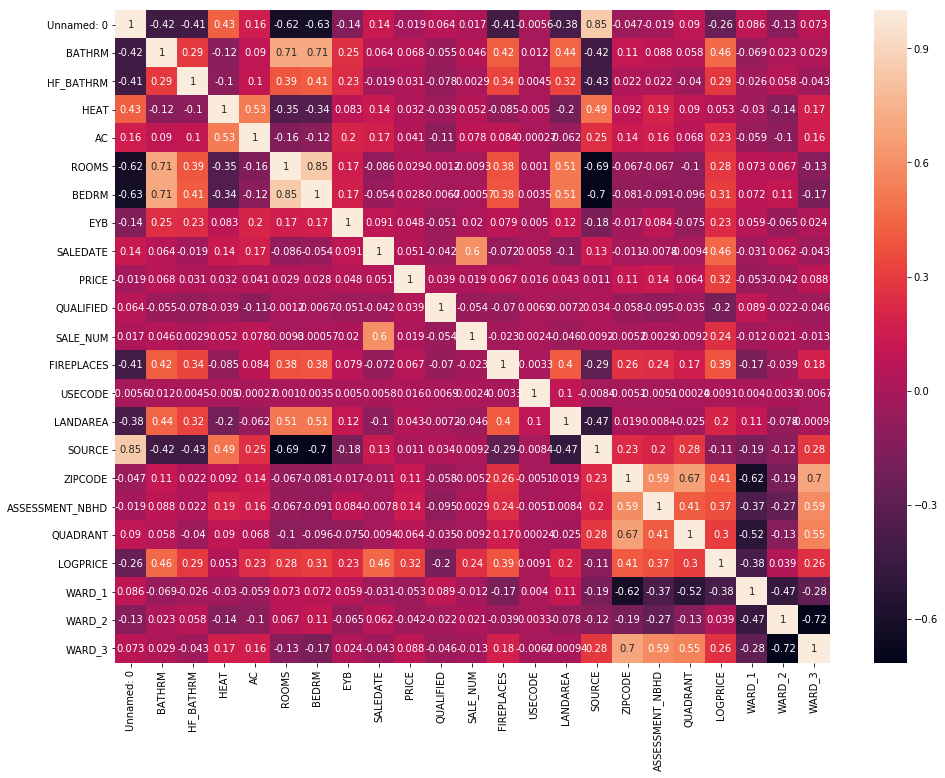

In [132]:
plt.figure(figsize=(16,12))
sns.heatmap(data_2.corr(), annot = True )

In [133]:
data_2.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'ROOMS', 'BEDRM',
       'EYB', 'SALEDATE', 'PRICE', 'QUALIFIED', 'SALE_NUM', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'SOURCE', 'ZIPCODE', 'ASSESSMENT_NBHD',
       'QUADRANT', 'LOGPRICE', 'WARD_1', 'WARD_2', 'WARD_3'],
      dtype='object')

### <a id='1'>1. Part B - Logistics model</a>

### <a id='1.1'> *Model 1:</a> 
**Using 5 independent variables and at least one independent variable SOURCE as  a binary categorical variable and at least one independent variable WARD as a multi-class categorical variable.**

In [134]:
X = data_2[['BATHRM', 'WARD_1','WARD_2','WARD_3','ROOMS','BEDRM']]
Y = data_2['SOURCE']
print(X.shape,'X')
print(Y.shape,'Y')

(97355, 6) X
(97355,) Y


In [135]:
type(X)
type(Y)

pandas.core.series.Series

In [136]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [137]:
# setting Logistic regression classifier
# scikit-learn includes the intercept.

lr = LogisticRegression(C=1e9)

#dividing data to have a training and a testing set
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size= .2, random_state=0)

# Logistic regression metrics
LRm = lr.fit(X_train, Y_train)

# The returned estimates for all classes are ordered by the label of classes.
LRm.predict_proba(x_test)

array([[1.75579933e-01, 8.24420067e-01],
       [9.99562203e-01, 4.37796776e-04],
       [9.99988657e-01, 1.13432409e-05],
       ...,
       [9.93569591e-01, 6.43040911e-03],
       [9.62472577e-01, 3.75274235e-02],
       [9.50204601e-01, 4.97953990e-02]])

In [138]:
print(LRm.intercept_)
print(LRm.coef_)

[7.67496385]
[[ 0.93718313  1.55992559  2.50356502  3.61147324 -1.75586877 -1.27282555]]


In [139]:
# Predict confidence scores for samples.
LRm.decision_function(x_test)

array([  1.5465858 ,  -7.73331784, -11.38687717, ...,  -5.04026594,
        -3.24443362,  -2.94875474])

In [140]:
LRm.predict(x_test)

array([1, 0, 0, ..., 0, 0, 0])

In [141]:
pred = LRm.predict(x_test)

In [142]:
regression_predicted = pd.DataFrame([])
regression_predicted = regression_predicted.append(pd.DataFrame({'Y_test':y_test, 'y_pred' :pred}), ignore_index=True)
regression_predicted.head(20)

,Y_test,y_pred
0,0,1
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,1,1
8,0,0
9,0,0


In [143]:
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test, pred))

print("RMSE is %s" %np.sqrt(metrics.mean_squared_error(y_test, pred)))

Accuracy score using Logistic regression is 0.9373427148066356
RMSE is 0.25031437272630686


In [144]:
k=10 #10 fold cross validation
score=[]
rmse =[]
for i in range(k):
    X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state=i)
    # Logistic regression metrics
    LRm = lr.fit(X_train, Y_train)
    acs =metrics.accuracy_score(y_test, LRm.predict(x_test))
    r = np.sqrt(metrics.mean_squared_error(y_test, pred))
    score.append(acs)
    rmse.append(r)
    
print ('Score: %s' %score)

print ('Mean Score: %s' %np.mean(score))
print ('Mean STD: %s' %np.std(score))
print('Mean RMSE: %s' %np.mean(rmse))


#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)

#LogisticRegression(solver='lbfgs')

#logistic_regression_model=LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear')

Score: [0.9373427148066356, 0.9387807508602537, 0.9386266755687946, 0.9378049406810128, 0.936418263057881, 0.93600739561399, 0.9396538441785219, 0.9381644496944174, 0.9393456935956037, 0.936418263057881]
Mean Score: 0.9378562991114991
Mean STD: 0.001217097282612993
Mean RMSE: 0.6486161275905297


In [145]:
#confusion matrix
confusion_matrix(y_test, pred) 


array([[6981, 4585],
       [4787, 3118]])

In [146]:
#Classification Report
target = ['Condominium 0', 'Residential 1']
print(classification_report(y_test, pred, target_names=target))

               precision    recall  f1-score   support

Condominium 0       0.59      0.60      0.60     11566
Residential 1       0.40      0.39      0.40      7905

    micro avg       0.52      0.52      0.52     19471
    macro avg       0.50      0.50      0.50     19471
 weighted avg       0.52      0.52      0.52     19471



### <a id='1.2'> *Model 2:</a> 

**Using 5 independent variables and at least one independent variable SOURCE as  a binary categorical variable and at least one independent variable WARD as a multi-class categorical variable.**

In [147]:
X = data_2[['ZIPCODE', 'WARD_1','WARD_2','WARD_3','QUADRANT','ASSESSMENT_NBHD']]
Y = data_2['SOURCE']
print(X.shape,'X')
print(Y.shape,'Y')

(97355, 6) X
(97355,) Y


In [148]:
type(X)
type(Y)

pandas.core.series.Series

In [149]:
# setting Logistic regression classifier
# scikit-learn includes the intercept.

lr = LogisticRegression(C=1e9)

#dividing data to have a training and a testing set
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size= .2, random_state=0)

# Logistic regression metrics
LRm = lr.fit(X_train, Y_train)

# The returned estimates for all classes are ordered by the label of classes.
LRm.predict_proba(x_test)

array([[0.58749056, 0.41250944],
       [0.35040697, 0.64959303],
       [0.6093322 , 0.3906678 ],
       ...,
       [0.41470805, 0.58529195],
       [0.80779779, 0.19220221],
       [0.45154465, 0.54845535]])

In [150]:
print(LRm.intercept_)
print(LRm.coef_)

[-0.91928036]
[[-0.24100936 -1.12572851 -0.41180163  0.61824978  0.75934955  0.09090493]]


In [151]:
# Predict confidence scores for samples.
LRm.decision_function(x_test)

array([-0.35360111,  0.61725082, -0.44450604, ...,  0.34453602,
       -1.43576376,  0.1944316 ])

In [152]:
LRm.predict(x_test)

array([0, 1, 0, ..., 1, 0, 1])

In [153]:
pred = LRm.predict(x_test)

In [154]:
regression_predicted = pd.DataFrame([])
regression_predicted = regression_predicted.append(pd.DataFrame({'Y_test':y_test, 'y_pred' :pred}), ignore_index=True)
regression_predicted.head(20)

,Y_test,y_pred
0,0,0
1,0,1
2,0,0
3,1,0
4,0,1
5,0,1
6,1,1
7,1,1
8,0,0
9,0,0


In [155]:
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test, pred))

print("RMSE is %s" %np.sqrt(metrics.mean_squared_error(y_test, pred)))

Accuracy score using Logistic regression is 0.6639617893277181
RMSE is 0.5796880287467405


In [156]:
k=10 #10 fold cross validation
score=[]
rmse =[]
for i in range(k):
    X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state=i)
    # Logistic regression metrics
    LRm = lr.fit(X_train, Y_train)
    acs =metrics.accuracy_score(y_test, LRm.predict(x_test))
    r = np.sqrt(metrics.mean_squared_error(y_test, pred))
    score.append(acs)
    rmse.append(r)
    
print ('Score: %s' %score)

print ('Mean Score: %s' %np.mean(score))
print ('Mean STD: %s' %np.std(score))
print('Mean RMSE: %s' %np.mean(rmse))


#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)

#LogisticRegression(solver='lbfgs')

#logistic_regression_model=LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear')

Score: [0.6639617893277181, 0.66421858148015, 0.6601099070412408, 0.6633454881618818, 0.6603153407631863, 0.662112885830209, 0.6675055210312772, 0.6702275178470546, 0.6641158646191773, 0.6645267320630681]
Mean Score: 0.6640439628164962
Mean STD: 0.0028998372487820134
Mean RMSE: 0.6695511025845916


In [157]:
#confusion matrix
confusion_matrix(y_test, pred) 


array([[8059, 3507],
       [5502, 2403]])

In [158]:
#Classification Report
target = ['Condominium 0', 'Residential 1']
print(classification_report(y_test, pred, target_names=target))

               precision    recall  f1-score   support

Condominium 0       0.59      0.70      0.64     11566
Residential 1       0.41      0.30      0.35      7905

    micro avg       0.54      0.54      0.54     19471
    macro avg       0.50      0.50      0.49     19471
 weighted avg       0.52      0.54      0.52     19471



### <a id='1.3'> *Model 3:</a> 

**Using 5 independent variables and at least one independent variable SOURCE as  a binary categorical variable and at least one independent variable WARD as a multi-class categorical variable.**


In [159]:
X = data_2[['LOGPRICE', 'WARD_1','WARD_2','WARD_3','SALE_NUM','SALEDATE']]
Y = data_2['SOURCE']
print(X.shape,'X')
print(Y.shape,'Y')

(97355, 6) X
(97355,) Y


In [160]:
type(X)
type(Y)

pandas.core.series.Series

In [161]:
# setting Logistic regression classifier
# scikit-learn includes the intercept.

lr = LogisticRegression(C=1e9)

#dividing data to have a training and a testing set
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size= .2, random_state=0)

# Logistic regression metrics
LRm = lr.fit(X_train, Y_train)

# The returned estimates for all classes are ordered by the label of classes.
LRm.predict_proba(x_test)

array([[0.51368144, 0.48631856],
       [0.2967997 , 0.7032003 ],
       [0.63501754, 0.36498246],
       ...,
       [0.51964742, 0.48035258],
       [0.89838499, 0.10161501],
       [0.50921031, 0.49078969]])

In [162]:
print(LRm.intercept_)
print(LRm.coef_)

[-0.03625658]
[[-0.94497921 -1.56684436  0.02113011  1.50945767  0.14034974  0.00560576]]


In [163]:
# Predict confidence scores for samples.
LRm.decision_function(x_test)

array([-0.05473944,  0.86258426, -0.55380331, ..., -0.07863016,
       -2.1794074 , -0.03684541])

In [164]:
LRm.predict(x_test)

array([0, 1, 0, ..., 0, 0, 0])

In [165]:
pred = LRm.predict(x_test)

In [166]:
regression_predicted = pd.DataFrame([])
regression_predicted = regression_predicted.append(pd.DataFrame({'Y_test':y_test, 'y_pred' :pred}), ignore_index=True)
regression_predicted.head(20)

,Y_test,y_pred
0,0,0
1,0,1
2,0,0
3,1,0
4,0,0
5,0,1
6,1,1
7,1,1
8,0,0
9,0,0


In [167]:
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test, pred))

print("RMSE is %s" %np.sqrt(metrics.mean_squared_error(y_test, pred)))

Accuracy score using Logistic regression is 0.6862513481588003
RMSE is 0.5601327091334692


In [168]:
k=10 #10 fold cross validation
score=[]
rmse =[]
for i in range(k):
    X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state=i)
    # Logistic regression metrics
    LRm = lr.fit(X_train, Y_train)
    acs =metrics.accuracy_score(y_test, LRm.predict(x_test))
    r = np.sqrt(metrics.mean_squared_error(y_test, pred))
    score.append(acs)
    rmse.append(r)
    
print ('Score: %s' %score)

print ('Mean Score: %s' %np.mean(score))
print ('Mean STD: %s' %np.std(score))
print('Mean RMSE: %s' %np.mean(rmse))


#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)

#LogisticRegression(solver='lbfgs')

#logistic_regression_model=LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear')

Score: [0.6862513481588003, 0.6889219865440912, 0.6867135740331776, 0.6882543269477684, 0.6835807097735094, 0.6852755379795593, 0.6915926249293821, 0.6896410045709003, 0.6874325920599866, 0.6881516100867957]
Mean Score: 0.6875815315083972
Mean STD: 0.0021627266195608187
Mean RMSE: 0.6683438989754354


In [169]:
#confusion matrix
confusion_matrix(y_test, pred) 



array([[7985, 3581],
       [5444, 2461]])

In [170]:
#Classification Report
target = ['Condominium 0', 'Residential 1']
print(classification_report(y_test, pred, target_names=target))

               precision    recall  f1-score   support

Condominium 0       0.59      0.69      0.64     11566
Residential 1       0.41      0.31      0.35      7905

    micro avg       0.54      0.54      0.54     19471
    macro avg       0.50      0.50      0.50     19471
 weighted avg       0.52      0.54      0.52     19471



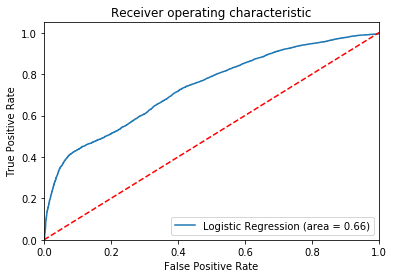

In [171]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LRm.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, LRm.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### <a id='2'>2. Cross Validation on Logistics Regression</a>
#### Model evaluation based on K-fold cross-validation using cross_val_score() function

In [172]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, Y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, Y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, Y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.640
LogisticRegression average log_loss is 0.648
LogisticRegression average auc is 0.687


In [173]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, Y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.640 (+/-0.137)
LogisticRegression average log_loss: 0.648 (+/-0.107)
LogisticRegression average auc: 0.687 (+/-0.141)


### <a id='3'>3. Multi-colinearity and step-wise Regression</a> 

**Taking model 1 from linear Regression** <br>
Using backward step wise regression that is taking out unnecessary features step by step
<br>
Colinearity is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. To detect colinearity among variables, simply create a correlation matrix and find variables with large absolute values. While,Multicolinearity on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear.

The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

Steps for Implementing VIF:
1. Run a multiple regression.
2. Calculate the VIF factors.
3. Inspect the factors for each predictor variable, if the VIF is between 5-10, multicolinearity is likely present and you   should consider dropping the variable.

## <a  id='3.1'> *Model 1:</a>  
  

In [189]:
y= data_2['LOGPRICE']
X=data_2.drop(['PRICE','LOGPRICE'], axis=1)
lm = LinearRegression()
r2= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(r2_score))
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("R2",r2.mean())
print("Mean RMSE",mean_rms_error)
#training model
X2 = sm.add_constant(X)
y =y
model = linear_model.LinearRegression()
model = sm.OLS(y, X2)
results = model.fit()
results.summary()

R2 0.4706781782733098
Mean RMSE 0.5407657009731691


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LOGPRICE   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     9133.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        12:55:02   Log-Likelihood:                -69543.
No. Observations:               97355   AIC:                         1.391e+05
Df Residuals:                   97334   BIC:                         1.393e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -87.6957      0.484   -181.111      0.000     -88.645     -86.747
Unnamed: 0      -2.197e-06   1.33e-07    -16.481      0.000   -2.46e-06   -1.94e-06
BATHRM              0.1373      0.003     50.538      0.000       0.132       0.143
HF_BATHRM           0.1263      0.003     38.397      0.000       0.120       0.133
HEAT                0.0118      0.003      3.625      0.000       0.005       0.018
AC                  0.1264      0.005     24.714      0.000       0.116       0.136
ROOMS               0.0078      0.001      6.128      0.000       0.005       0.010
BEDRM               0.0745      0.002     30.570      0.000       0.070       0.079
EYB                 0.0021   6.31e-05     33.417      0.000       0.002       0.002
SALEDATE            0.0618      0.000    197.869      0.000       0.061       0.062
QUALIFIED          -0.2136      0.004    -54.714      0.000      -0.221      -0.206
SALE_NUM           -0.0394      0.001    -27.608      0.000      -0.042      -0.037
FIREPLACES          0.1255      0.003     49.233      0.000       0.121       0.131
USECODE             0.3889      0.158      2.467      0.014       0.080       0.698
LANDAREA         5.269e-06   7.42e-07      7.105      0.000    3.82e-06    6.72e-06
SOURCE              0.0435      0.009      4.846      0.000       0.026       0.061
ZIPCODE             0.0738      0.003     28.156      0.000       0.069       0.079
ASSESSMENT_NBHD     0.1559      0.003     54.701      0.000       0.150       0.162
QUADRANT            0.1079      0.005     23.372      0.000       0.099       0.117
WARD_1            -29.5153      0.161   -182.807      0.000     -29.832     -29.199
WARD_2            -29.1154      0.162   -180.208      0.000     -29.432     -28.799
WARD_3            -29.0650      0.161   -180.128      0.000     -29.381     -28.749
==============================================================================
Omnibus:                    39929.004   Durbin-Watson:                   1.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9723580.284
Skew:                          -0.788   Prob(JB):                         0.00
Kurtosis:                      51.934   Cond. No.                     8.05e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.76e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [190]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,5.6,Unnamed: 0
1,2.8,BATHRM
2,1.4,HF_BATHRM
3,1.8,HEAT
4,1.6,AC
5,4.5,ROOMS
6,4.6,BEDRM
7,1.2,EYB
8,1.7,SALEDATE
9,1.0,QUALIFIED


  ## <a id='3.2'> *Model 2:</a>

In [192]:
y= data_2['LOGPRICE']
X=data_2[['ASSESSMENT_NBHD','ZIPCODE','BATHRM','FIREPLACES','SALEDATE','EYB','LANDAREA','QUADRANT']]
lm = LinearRegression()
r2= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(r2_score))
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("R2",r2.mean())
print("Mean RMSE",mean_rms_error)
#training model
X2 = sm.add_constant(X)
y =y
model = linear_model.LinearRegression()
model = sm.OLS(y, X2)
results = model.fit()
results.summary()

R2 0.4311107423904182
Mean RMSE 0.5642783436399906


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LOGPRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                 1.770e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        14:38:14   Log-Likelihood:                -77265.
No. Observations:               97355   AIC:                         1.545e+05
Df Residuals:                   97346   BIC:                         1.546e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -108.5308      0.535   -203.022      0.000    -109.579    -107.483
ASSESSMENT_NBHD     0.1595      0.003     55.262      0.000       0.154       0.165
ZIPCODE             0.1468      0.002     64.470      0.000       0.142       0.151
BATHRM              0.2408      0.002    114.145      0.000       0.237       0.245
FIREPLACES          0.1993      0.003     76.153      0.000       0.194       0.204
SALEDATE            0.0568      0.000    215.644      0.000       0.056       0.057
EYB                 0.0030   6.52e-05     45.443      0.000       0.003       0.003
LANDAREA         8.455e-06   7.31e-07     11.574      0.000    7.02e-06    9.89e-06
QUADRANT            0.1269      0.005     26.954      0.000       0.118       0.136
==============================================================================
Omnibus:                    45333.221   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5237374.494
Skew:                          -1.265   Prob(JB):                         0.00
Kurtosis:                      38.843   Cond. No.                     1.25e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [194]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,9.6,ASSESSMENT_NBHD
1,15.0,ZIPCODE
2,6.5,BATHRM
3,1.9,FIREPLACES
4,5411.2,SALEDATE
5,5443.1,EYB
6,2.1,LANDAREA
7,20.8,QUADRANT


3)

In [ ]:
y= data_2['LOGPRICE']
X=data_2[['ASSESSMENT_NBHD','HF_BATHRM','SALE_NUM','SALEDATE','ROOMS','BEDRM','AC','BATHRM','ZIPCODE','QUALIFIED','EYB','QUADRANT','FIREPLACES']]
lm = LinearRegression()
r2= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(r2_score))
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("R2",r2.mean())
print("Mean RMSE",mean_rms_error)
#training model
X2 = sm.add_constant(X)
y =y
model = linear_model.LinearRegression()
model = sm.OLS(y, X2)
results = model.fit()
results.summary()

In [197]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,9.8,ASSESSMENT_NBHD
1,2.2,HF_BATHRM
2,2.9,SALE_NUM
3,5812.7,SALEDATE
4,25.2,ROOMS
5,18.6,BEDRM
6,6.4,AC
7,12.3,BATHRM
8,15.2,ZIPCODE
9,9.9,QUALIFIED


* Is there any multi-colinearity in the model?  
Answer:Yes there is some between Rooms and Bedrooms and also the zipcode and wards


* In the multiple regression models are predictor variables independent of all the other predictor variables?  
Answer:No


* In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model. 
Answer:Siginificant is WARD


* Cross-validate the models. How well did they do?   
Answer:10 fold Cv was used and the mean of the scores obtained for the model is 0.664 having a standard deviation of 5% and an RMSE of 0.669 which are not far apart



### <a id='4'>4. Conclusion</a>

* Is the relationship significant?   
Answer:Yes the relationship is significant as the coefficient values changes significantly for the dependant variable 'WARD' as compared to ZIPCODE, ROOMS, BEDRM


* Are any model assumptions violated?   
Answer:Since the regression was performed on binary column which had Condomimum as 0 and Residential as 1, no assumption was violated.


* Does the model make sense?  Interpret the meaning of each independent variable.  
Answer:Yes the model makes sense in prediction of Housing price


* Cross-validate the model. How well did it do? 

Answer:10 fold Cv was used and the mean of the scores obtained for the model is 0.664 having a standard deviation of 5% and an RMSE of 0.669 which are not far apart


* Calculate the probability of getting the dependent variable
Answer: The probability of getting the dependent variable is based on p values



### <a id='5'>5. Contributions statement</a>

Approximately 40% of the code was referred from similar Kernel's from kaggle, 60% of the code was manipulated and written by me based on the documentations and citations.

### <a id='6'>6. Citations</a>

1. https://www.geeksforgeeks.org/python-for-data-science/ --> Method descriptions
2. https://www.kaggle.com/ananthreddy/red-wine-quality-linear-regression  --> Similar Notebook
3. https://www.kaggle.com/madhurisivalenka/basic-machine-learning-with-red-wine-quality-data --> Similar Notebook used for reference
4. https://mode.com/python-tutorial/pandas-dataframe/     -> Python Documentation 
5. https://seaborn.pydata.org/  ->Seaborn Plots(Documentation)
6. https://www.wikipedia.org/ -> Definitions
7. https://pandas.pydata.org/pandas-docs/stable/ --> Pandas Documentation

### <a id='7'>7. License</a>

Copyright 2019 SAYALI BHAGAT

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.